# Import Packages
When working with Python notebooks, it is important to import the necessary packages at the beginning of the notebook. Packages are collections of modules and functions that provide specific functionality that can be used in a program.

In some instances you may have to install packages

In [61]:
#Import Packages
#!pip install missingno   # Install the missingno library if you don't have it already
import missingno as msno  

import pandas as pd  # Import the pandas library, which provides data manipulation tools for working with tabular data, such as loading data from files and performing operations on data frames.
import seaborn as sns  # Import the seaborn library, which provides data visualization tools for creating various types of charts and plots, including heatmaps and scatter plots.
import matplotlib.pyplot as plt  # Import the matplotlib library, which provides low-level plotting functionality for creating custom visualizations and controlling plot aesthetics.
import numpy as np  # Import the numpy library, which provides tools for working with numerical data, such as creating and manipulating arrays and performing mathematical operations.


#Preprocessing
import sklearn  # Import the scikit-learn library, which is a popular machine learning library in Python that provides a wide range of tools for classification, regression, clustering, and more.
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  # Import the preprocessing module from scikit-learn, which provides functions for scaling and encoding data before it is fed into a machine learning algorithm.
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit  # Import various modules from scikit-learn's model_selection sub-library, which provides tools for model selection and hyperparameter tuning, as well as splitting data into training and testing sets for evaluation.
from sklearn.model_selection import cross_val_predict as cvp  # Import the cross_val_predict function from the model_selection sub-library, which is used for generating cross-validated estimates of a model's performance.
from sklearn.model_selection import cross_val_score  # Import the cross_val_score function from the model_selection sub-library, which is used for calculating cross-validated scores for a given model and dataset.
from sklearn import metrics  # Import the metrics module from scikit-learn, which provides functions for evaluating the performance of machine learning models using various metrics, such as accuracy, precision, recall, and F1-score.


#Performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score #Measure performance of the model

#Model
from sklearn.ensemble import RandomForestRegressor #Main ML model selected

In [2]:
#Optional mount google drive - only used for google colab!!
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [3]:
#Your file path below
#df = pd.read_csv('YOUR_FILE_PATH')
df = pd.read_csv('/content/drive/MyDrive/Imperial - ML/Week 26/Final Project/vehicles.csv')

# Data Inspection

In [4]:
#Get variables names and sample size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Drop variables
Drop variables based on domain knowledge 

In [5]:
df = df.drop('url', axis=1) #URL not connected to prices
df = df.drop('region_url', axis=1) #Region info capatured in other variable
df = df.drop('VIN', axis=1) #Vin unique to vechile so not required
df = df.drop('image_url', axis=1) #not related to price as meta data
df = df.drop('description', axis=1) #remove for now - could perform NLP later
df = df.drop('county', axis=1) #0% data for this
df = df.drop('posting_date', axis=1) #remove for now - could feature engineer

<Axes: >

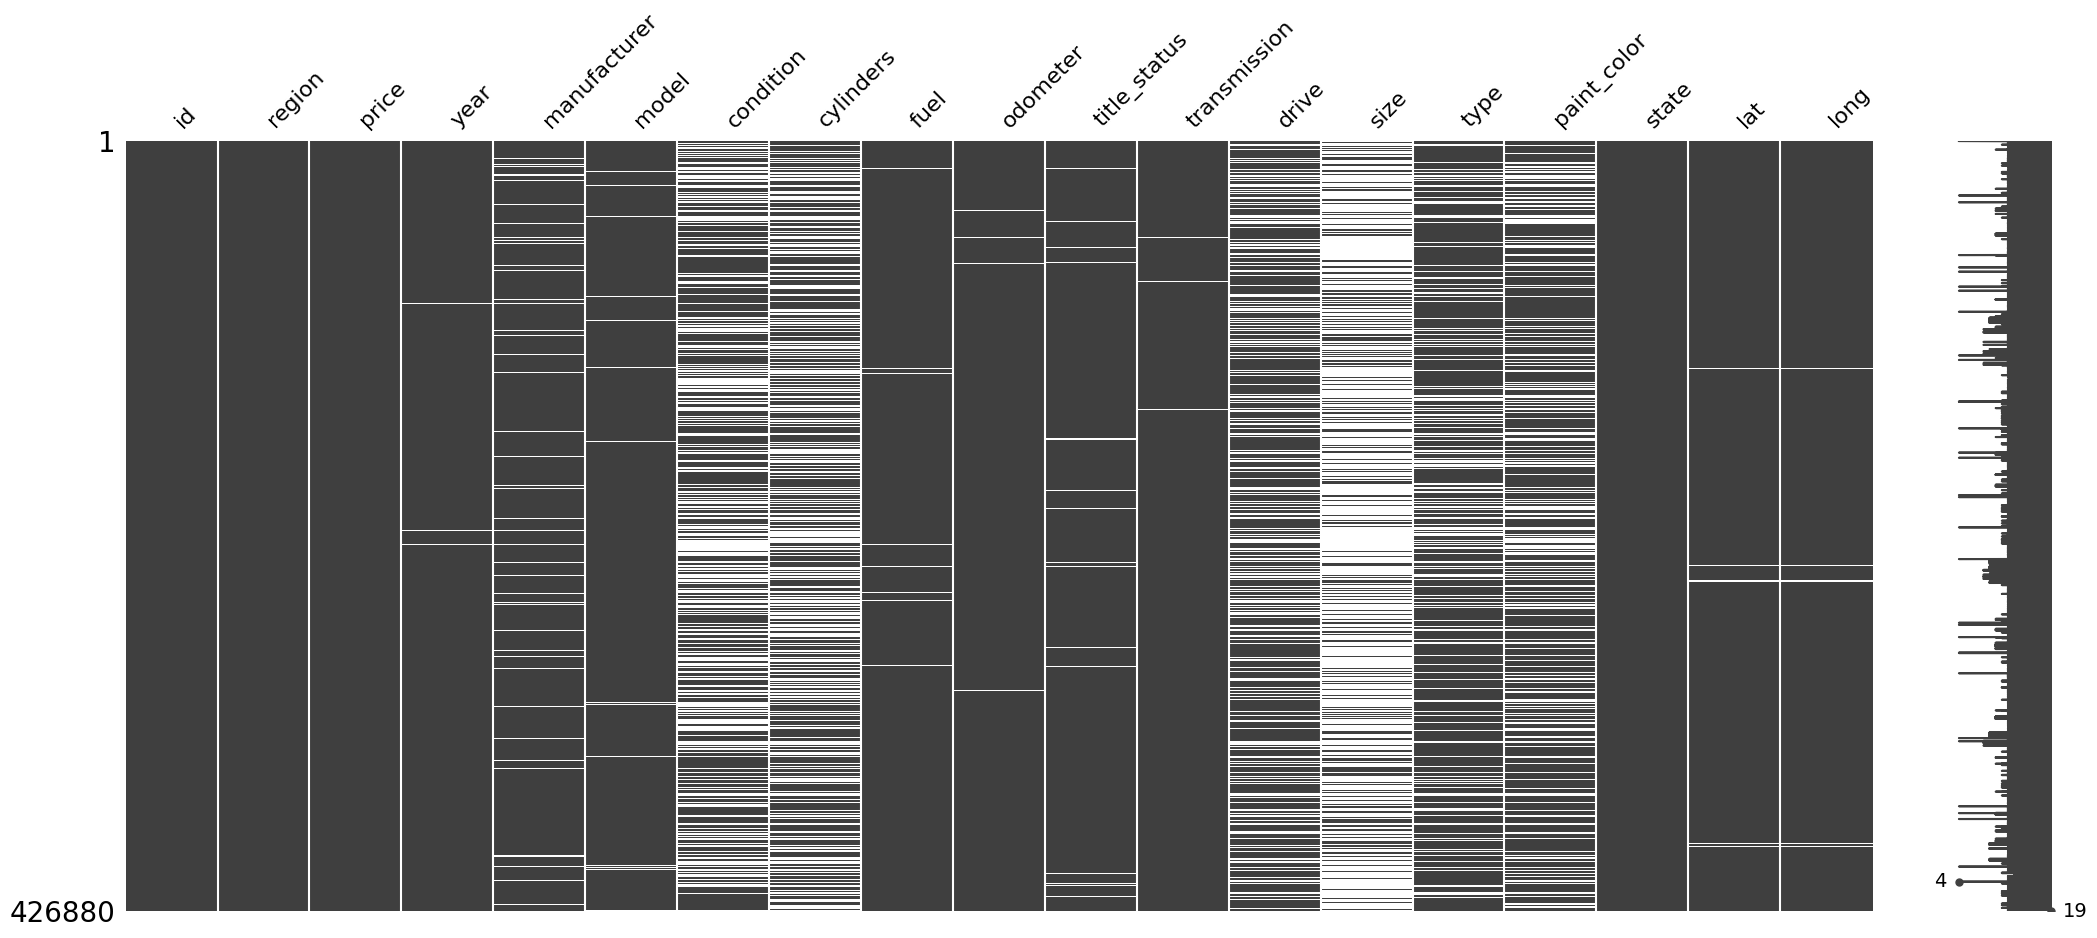

In [6]:
# Visualize missing data using the missingno matrix
msno.matrix(df)

As you can see, the condition, cylinder, drive, size have quite large gaps, represented by the white space

## Drop variables based on data availability
Drop variables based on data availablity

In [7]:
#Print data availabity % (higher is better)
print(df.count() / len(df) * 100)

id              100.000000
region          100.000000
price           100.000000
year             99.717719
manufacturer     95.866286
model            98.763821
condition        59.214768
cylinders        58.377530
fuel             99.294181
odometer         98.969265
title_status     98.069247
transmission     99.401237
drive            69.413653
size             28.232524
type             78.247283
paint_color      69.498922
state           100.000000
lat              98.465845
long             98.465845
dtype: float64


In [8]:
# Define the threshold for the percentage of data available
threshold = 80

# Calculate the percentage of data available for each column
data_coverage = df.count() / len(df) * 100

# Get the list of column names with a data coverage below the threshold
columns_to_drop = data_coverage[data_coverage < threshold].index.tolist()

# Drop the columns from the DataFrame
df = df.drop(columns_to_drop, axis=1)


In [9]:
# Drop rows with missing values
df = df.dropna()

<Axes: >

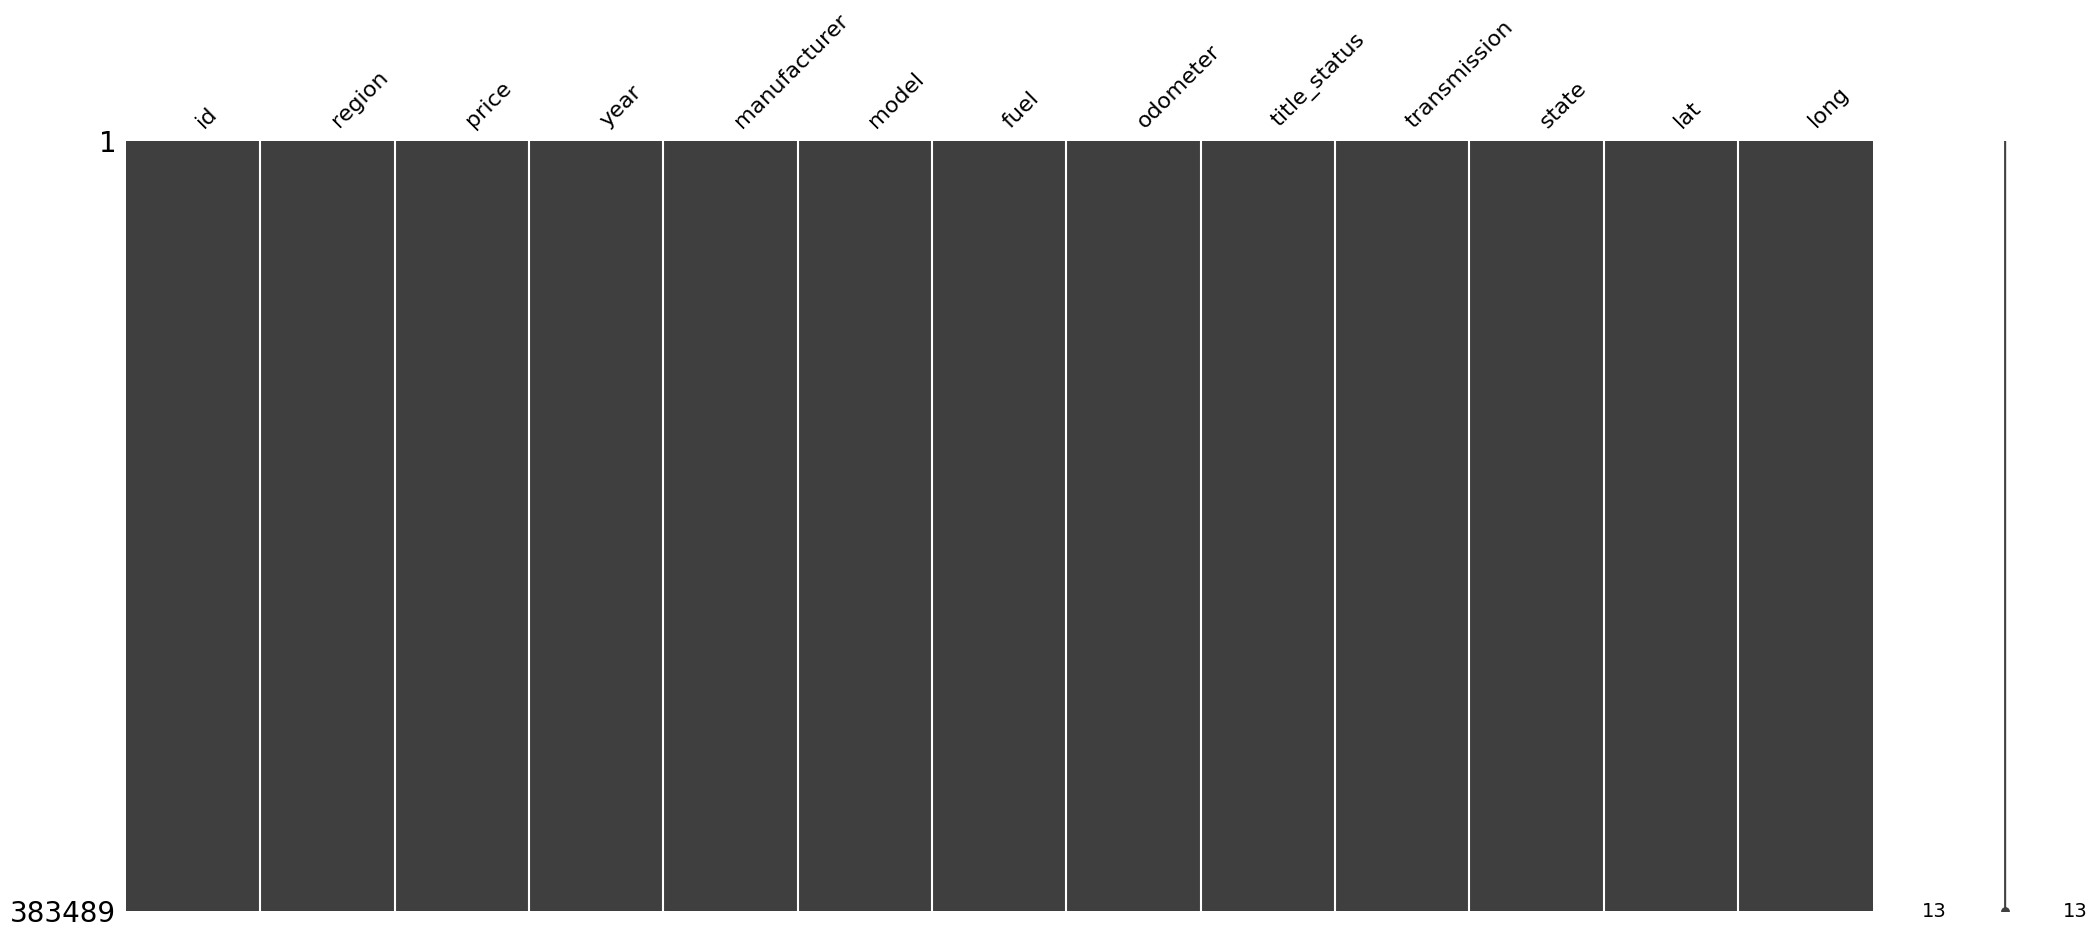

In [10]:
#Replot the missing data visualisation
msno.matrix(df)

Now we have a solid block of black we have 100% data availability, and we can move to the next stage

# Data cleaning 
Remove extreme values and encode categoric variables

In [11]:
# Find extreme thresolds of df - at 1% of tails of distribution
price_min = np.percentile(df["price"], 1)  # Get the 1% percentile of "price"
price_max = np.percentile(df["price"], 99)  # Get the 99% percentile of "price"

# Drop rows within the 1% extreme of the top and bottom distribution of "price"
df = df[(df["price"] > price_min) & (df["price"] < price_max)]


In [12]:
# Drop values older than 1998 (consider to be a classic car and harder to price predict)
df = df[df["year"] >= 1998]

# Drop values newer than 2021 as small sample size in thed ata
df = df[df["year"] < 2022]

In [13]:
#Print the value count for each year, to check this has worked
df['year'].value_counts()

2018.0    30280
2017.0    29840
2013.0    25711
2015.0    25481
2014.0    24736
2016.0    24328
2019.0    20792
2012.0    20415
2011.0    17597
2020.0    15887
2008.0    14790
2010.0    13759
2007.0    12885
2006.0    10809
2009.0    10555
2005.0     9140
2004.0     7890
2003.0     6275
2002.0     4926
2001.0     3816
2000.0     3083
1999.0     2611
1998.0     1689
2021.0     1275
Name: year, dtype: int64

Explain

In [ ]:
# Determine categorical features by checking if the data type is not numeric
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']  # Define a list of numeric data types
categorical_columns = []  # Initialize an empty list to store the categorical feature names
features = df.columns.values.tolist()  # Get a list of all feature names in the DataFrame
for col in features:
    if df[col].dtype in numerics: continue # If the feature data type is numeric, skip to the next feature        
    categorical_columns.append(col)  # If the feature data type is non-numeric, add it to the list of categorical features

# Encode categorical features using LabelEncoder
for col in categorical_columns:  # Iterate over each categorical feature
    if col in df.columns:  # Check if the feature exists in the DataFrame
        le = LabelEncoder()  # Initialize a LabelEncoder object
        le.fit(list(df[col].astype(str).values))  # Fit the encoder to the feature values, converting them to strings first
        df[col] = le.transform(list(df[col].astype(str).values))  # Use the fitted encoder to transform the feature values into encoded integers


In [15]:
df.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,lat,long
27,7316814884,16,33590,2014.0,13,14241,2,57923.0,0,2,1,32.590,-85.4800
28,7316814758,16,22590,2010.0,7,14540,2,71229.0,0,2,1,32.590,-85.4800
29,7316814989,16,39590,2020.0,7,14561,2,19160.0,0,2,1,32.590,-85.4800
30,7316743432,16,30990,2017.0,37,16837,2,41124.0,0,2,1,32.590,-85.4800
31,7316356412,16,15000,2013.0,12,7113,2,128000.0,0,0,1,32.592,-85.5189


# Make data smaller

In [16]:
len(df)

338570

In [17]:
df_full_clean = df #Save a copy

In [50]:
# Due to the size of the dataset, I will take a 1% representative sample for now...
df = df.sample(frac=0.01, random_state=42)

# Train/test split

In [52]:
#Select variable name for Y, create new variable for it, drop from old one
target_name = 'price'
y = df[target_name]
X = df.drop([target_name], axis=1)

In [53]:
#scale dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
# Synthesis test0 from df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Gridsearch

In [63]:
# We define the model
estimator = RandomForestRegressor(random_state = 42,criterion='friedman_mse')
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            'max_depth' : [4,5,6,7,8,9,15],
            "bootstrap"    : [True, False]
        }

#param_grid = {
#    'max_depth': [10, 90, 100, None],
#    'max_features': ["sqrt", "log2", None],
#    'min_samples_leaf': [1, 3, 5],
#    'min_samples_split': [2, 3, 4],
#    "bootstrap"    : [True, False],
#    'splitter': ["best", "random"]
#}

Grid = GridSearchCV(estimator, para_grids,cv= 5)
# We train model
Grid.fit(X_train, y_train)
best_param = Grid.best_estimator_
print(best_param)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

RandomForestRegressor(bootstrap=False, criterion='friedman_mse', max_depth=15,
                      max_features='log2', random_state=42)


#Define Model Performance

In [57]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# Model V1

In [62]:
random_forest = RandomForestRegressor(bootstrap=False, criterion='friedman_mse', max_depth=15,
                      max_features='log2', random_state=42)

random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 5681.077861007316
MSE: 66008703.7662176
RMSE: 8124.574066756829
R2 Score: 0.6347448554066124
------------------------------
RMSE Cross-Validation: 7954.379382945682
